### ORIGINAL DATA SOURCE:

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

-----------

The Kaggle Competition: [Cats and Dogs](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) includes 25,000 images of cats and dogs. We will be building a classifier that works with these images and attempt to detect dogs versus cats!

The pictures are numbered 0-12499 for both cats and dogs, thus we have 12,500 images of Dogs and 12,500 images of Cats. This is a huge dataset!!

--------
----------
------------


**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. **

### Visualizing the Data


-------
Let's take a closer look at the data.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
cat1 = cv2.imread("C:/Users/bobby/Downloads/CATS_DOGS/train/CAT/1.jpg")

In [4]:
cat1 = cv2.cvtColor(cat1,cv2.COLOR_BGR2RGB)

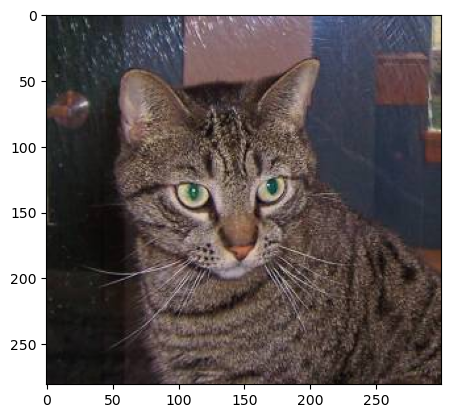

In [5]:
plt.imshow(cat1)

In [6]:
cat1.shape

(281, 300, 3)

In [7]:
dog1 = cv2.imread("C:/Users/bobby/Downloads/CATS_DOGS/train/DOG/1.jpg")

In [8]:
dog1 = cv2.cvtColor(dog1,cv2.COLOR_BGR2RGB)

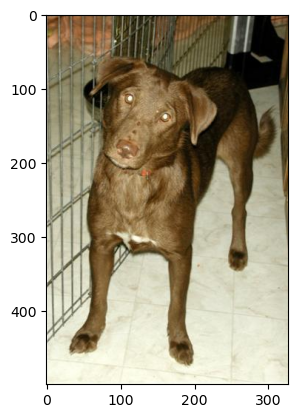

In [9]:
plt.imshow(dog1)

In [10]:
dog1.shape

(500, 327, 3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [15]:
## preprocessing of image data

from keras.preprocessing.image import ImageDataGenerator

In [16]:
image_gen = ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")

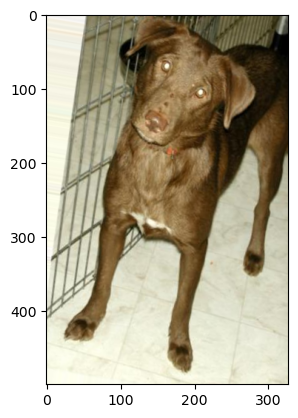

In [17]:
plt.imshow(image_gen.random_transform(dog1))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [18]:
## generating many manupulated images directly from directary

image_gen.flow_from_directory("C:/Users/bobby/Downloads/CATS_DOGS/train")

Found 18743 images belonging to 2 classes.


### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [19]:
input_shape = (150,150,3)

# Creating the Model

In [20]:
## craeting machin learning model
from keras.models import Sequential

In [28]:
## importing layers for models
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [29]:
## first step is creating a model

##creating sequential object
model = Sequential()

##1st convulutional layer
model.add(Conv2D(filters = 32,kernel_size=(3,3),input_shape=(150, 150, 3),activation="relu"))

##1st pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

## 2nd convulutional layer 
model.add(Conv2D(filters = 64,kernel_size=(3,3),input_shape=(150, 150, 3),activation="relu"))

##2nd pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

## 3rd convulutional layer 
model.add(Conv2D(filters = 64,kernel_size=(3,3),input_shape=(150, 150, 3),activation="relu"))

##3rd pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

##flatterning out pooling and convolution layer so dense can understand it(2d--> 1d)
model.add(Flatten())


##after flattering out we will gonaa add one more dense layer
model.add(Dense(128))

##activation function
model.add(Activation("relu"))

## dropout layer
model.add(Dropout(0.5))

##dense binary layer
model.add(Dense(1))

##activation function
model.add(Activation("sigmoid"))




##compilation of model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"]) 

In [31]:
## summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 17, 17, 64)       

# Training the Model

In [32]:
### training the model


###creating the batch size
batch_size = 16


## for the training data
train_image_gen = image_gen.flow_from_directory("C:/Users/bobby/Downloads/CATS_DOGS/train",target_size=input_shape[:2],batch_size = batch_size,class_mode="binary")

Found 18743 images belonging to 2 classes.


In [33]:
## for the test data

test_image_gen = image_gen.flow_from_directory("C:/Users/bobby/Downloads/CATS_DOGS/test",target_size=input_shape[:2],batch_size = batch_size,class_mode="binary")

Found 6240 images belonging to 2 classes.


In [34]:
## clasiifactions

train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [36]:
### fitting the generator


results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 37s 248ms/step - loss: 0.6895 - accuracy: 0.5467 - val_loss: 0.6767 - val_accuracy: 0.5729
Epoch 2/100
150/150 [==============================] - 36s 241ms/step - loss: 0.6858 - accuracy: 0.5612 - val_loss: 0.6884 - val_accuracy: 0.5208
Epoch 3/100
150/150 [==============================] - 36s 237ms/step - loss: 0.6800 - accuracy: 0.5558 - val_loss: 0.6887 - val_accuracy: 0.5208
Epoch 4/100
150/150 [==============================] - 35s 232ms/step - loss: 0.6874 - accuracy: 0.5533 - val_loss: 0.6668 - val_accuracy: 0.6094
Epoch 5/100
150/150 [==============================] - 34s 228ms/step - loss: 0.6761 - accuracy: 0.5684 - val_loss: 0.6830 - val_accuracy: 0.5156
Epoch 6/100
150/150 [==============================] - 34s 223ms/step - loss: 0.6765 - accuracy: 0.5696 - val_loss: 0.6666 - val_accuracy: 0.6042
Epoch 7/100
150/150 [==============================] - 35s 232ms/step - loss: 0.6564 - accuracy: 0.6042 - val_loss: 0.6594 -

Epoch 57/100
150/150 [==============================] - 28s 183ms/step - loss: 0.4439 - accuracy: 0.7983 - val_loss: 0.5124 - val_accuracy: 0.7604
Epoch 58/100
150/150 [==============================] - 27s 181ms/step - loss: 0.4727 - accuracy: 0.7758 - val_loss: 0.4341 - val_accuracy: 0.8125
Epoch 59/100
150/150 [==============================] - 32s 211ms/step - loss: 0.4402 - accuracy: 0.8033 - val_loss: 0.4336 - val_accuracy: 0.7760
Epoch 60/100
150/150 [==============================] - 30s 199ms/step - loss: 0.4349 - accuracy: 0.8037 - val_loss: 0.4503 - val_accuracy: 0.7917
Epoch 61/100
150/150 [==============================] - 30s 201ms/step - loss: 0.4306 - accuracy: 0.8071 - val_loss: 0.5336 - val_accuracy: 0.8021
Epoch 62/100
150/150 [==============================] - 28s 188ms/step - loss: 0.4386 - accuracy: 0.8042 - val_loss: 0.4156 - val_accuracy: 0.8177
Epoch 63/100
150/150 [==============================] - 29s 193ms/step - loss: 0.4501 - accuracy: 0.7992 - val_loss: 0

# Evaluating the Model

In [37]:
### evalution of the model

results.history["accuracy"]


[0.54666668176651,
 0.5612499713897705,
 0.5558333396911621,
 0.5533333420753479,
 0.5683814287185669,
 0.5695833563804626,
 0.6041666865348816,
 0.60916668176651,
 0.6320833563804626,
 0.627916693687439,
 0.6429166793823242,
 0.6445833444595337,
 0.6470833420753479,
 0.652916669845581,
 0.6633333563804626,
 0.6775000095367432,
 0.6658333539962769,
 0.6783333420753479,
 0.7179166674613953,
 0.6850000023841858,
 0.7058333158493042,
 0.7233333587646484,
 0.706250011920929,
 0.7089083790779114,
 0.7162500023841858,
 0.7266666889190674,
 0.7108333110809326,
 0.7225000262260437,
 0.7245833277702332,
 0.7400000095367432,
 0.7425000071525574,
 0.7416666746139526,
 0.7404166460037231,
 0.7262499928474426,
 0.7591666579246521,
 0.7512500286102295,
 0.7570833563804626,
 0.7454166412353516,
 0.7549999952316284,
 0.7670430541038513,
 0.7549999952316284,
 0.7504166960716248,
 0.7666248679161072,
 0.7766666412353516,
 0.7708333134651184,
 0.7762500047683716,
 0.778333306312561,
 0.7683333158493042,


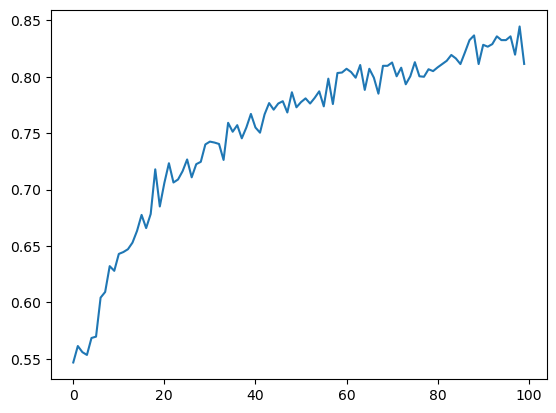

In [55]:
plt.plot(results.history['accuracy'])

# Predicting on new images

In [83]:
### prediction on new images
from keras.preprocessing import image
import numpy as np


## importing the file from directary
dog_file = "C:/Users/bobby/Downloads/CATS_DOGS/test/DOG/9981.jpg"

## loading the file
dog_img = image.load_img(dog_file, target_size=(150,150))

##convertin dog_imag to array
dog_img = image.img_to_array(dog_img)

##Expand image if necessary to hit 150 by 150 pixels
dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [84]:
prediction = model.predict(dog_img)

1/1 [==============================] - 0s 18ms/step


In [85]:
print(f"the probability that is a dog is : {prediction}")

the probability that is a dog is : [[0.8177127]]


In [127]:
## importing the file from directary
cat_file = "C:/Users/bobby/Downloads/CATS_DOGS/test/CAt/9695.jpg"

## loading the file
cat_img = image.load_img(cat_file, target_size=(150,150))

##convertin dog_imag to array
cat_img = image.img_to_array(cat_img)

##Expand image if necessary to hit 150 by 150 pixels
cat_img = np.expand_dims(cat_img, axis=0)
cat_img = cat_img/255

In [128]:
prediction = model.predict(cat_img)

1/1 [==============================] - 0s 16ms/step


In [129]:
print(f"the probability that is a cat is : {prediction}")

the probability that is a cat is : [[0.85603523]]
